# Correlation Matrix

It is used to calculate the correlation between different features.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Read csv file and import to df

df = pd.read_csv("new_model_training_dataset.csv")
df.head()

,typhoon_name,typhoon_year,grid_point_id,wind_speed,track_distance,total_buildings,percent_buildings_damaged
0,DURIAN,2006,6301,0.0,510.358125,379.0,0.0
1,DURIAN,2006,6302,0.0,521.466945,2.0,0.0
2,DURIAN,2006,6466,0.0,488.030454,38.0,0.0
3,DURIAN,2006,6467,0.0,499.140454,79.0,0.0
4,DURIAN,2006,6468,0.0,510.250454,1.0,0.0


In [3]:
df = df.drop(columns=["grid_point_id", "typhoon_year"])
#df.head()

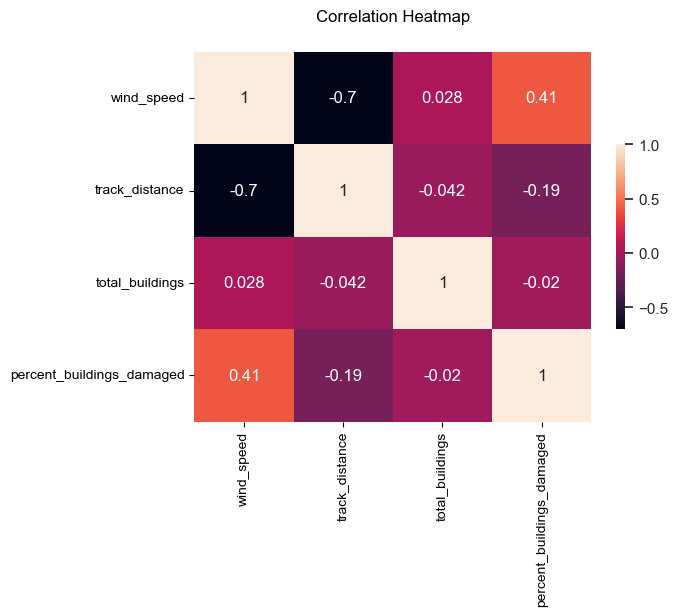

In [4]:
# Estimate correlation matrix

fig, ax = plt.subplots()

corrMatrix = df.corr()

plt.rcParams["figure.figsize"] = (4,4)

sn.set(font_scale=1)
heatmap = sn.heatmap(corrMatrix, annot=True, cbar_kws={"shrink": .5}, annot_kws={"size": 12})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=22)

plt.show()

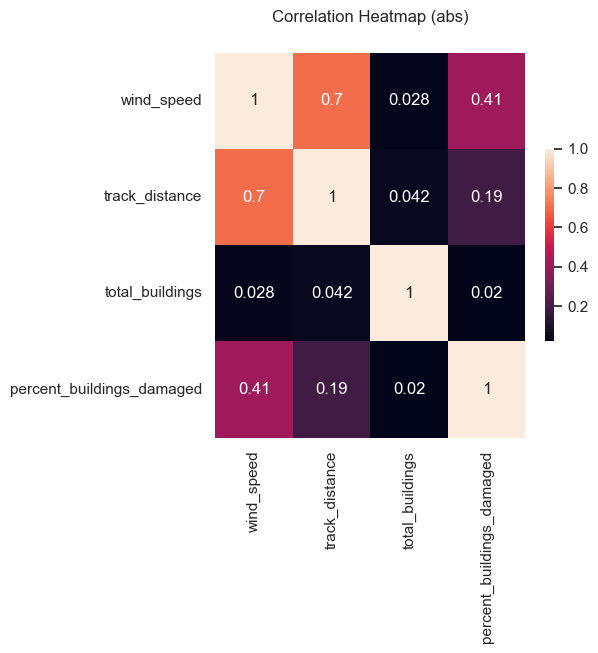

In [7]:
# The absolute value of correlation

fig, ax = plt.subplots()

corrMatrix_abs = df.corr().abs()
#print (corrMatrix)

plt.rcParams["figure.figsize"] = (4,4)

sn.set(font_scale=1)
heatmap = sn.heatmap(corrMatrix_abs, annot=True, cbar_kws={"shrink": .5}, annot_kws={"size": 12})
heatmap.set_title('Correlation Heatmap (abs)', fontdict={'fontsize':12}, pad=22)

plt.show()

In [18]:
# Print out correlated pairs of features
pair = corrMatrix_abs.where(np.triu(np.ones(corrMatrix_abs.shape),k=1).astype(np.bool)).stack().sort_values(ascending=True)
pairs= pair[pair.gt(0.8)]

if len(pairs) > 0:
    print(pairs)
else:
    print("No correlated features found!")

No correlated features found!


/var/folders/sx/c10hm4fj3glf7mw1_mzwcl700000gn/T/ipykernel_69095/1379174389.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pair = corrMatrix_abs.where(np.triu(np.ones(corrMatrix_abs.shape),k=1).astype(np.bool)).stack().sort_values(ascending=True)
